# Komiwojażer

Importacja bibliotek

In [43]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import tsplib95

In [44]:
# Open input file
infile = open('instance/berlin52.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[1] # NAME
FileType = infile.readline().strip().split()[1] # TYPE
Comment = infile.readline().strip().split()[1] # COMMENT
Dimension = infile.readline().strip().split()[1] # DIMENSION
EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
infile.readline()

# Read node list
N = int(Dimension)
nodelist = []
distances = np.zeros((N, N))

for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    nodelist.append([float(x), float(y)])

for i in range(0,N):
    for j in range(0, N):
        # xd = nodelist[i][i]
        distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
        distances[j][i] = distances[i][j]

# Close input file
infile.close()

Funkcja wczytująca dane z Berlina (2D Euclid)

In [45]:
def set_Matrix():
    # Open input file
    infile = open('instance/berlin52.tsp', 'r')

    # Read instance header
    Name = infile.readline().strip().split()[1] # NAME
    FileType = infile.readline().strip().split()[1] # TYPE
    Comment = infile.readline().strip().split()[1] # COMMENT
    Dimension = infile.readline().strip().split()[1] # DIMENSION
    EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
    infile.readline()

    # Read node list
    N = int(Dimension)
    nodelist = []
    distances = np.zeros((N, N))
    for i in range(0, N):
        x,y = infile.readline().strip().split()[1:]
        nodelist.append([float(x), float(y)])

    for i in range(0,N):
        for j in range(0, N):
            # xd = nodelist[i][i]
            distances[i][j] = int(math.sqrt((nodelist[i][0] - nodelist[j][0])**2 + (nodelist[i][1] - nodelist[j][1])**2))
            distances[j][i] = distances[i][j]

    # print(nodelist)
    # Close input file
    infile.close()
    return distances

# Zbiór używanych funkcji

In [46]:
# Wypisanie macierzy odległości
def print_matrix(Distance_Matrix):
    print(Distance_Matrix)

In [47]:
# Zainicjalizowanie symetrycznej losowej macierzy odległości
def symetric_random_instance(number_of_cities, min_distance, max_distance):
    seed = 2021
    np.random.seed(seed)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
        for j in range(number_of_cities):
            rand_matrix[j][i] = rand_matrix[i][j]
    return rand_matrix

A = symetric_random_instance(10,1,10)
print(A)

[[ 0  6 10  1  7  6  9  7  7  7]
 [ 6  0  6  8  2  2  6  3  1  4]
 [10  6  0  7  5  9  6  2  7  8]
 [ 1  8  7  0  7 10  3  5  4 10]
 [ 7  2  5  7  0  2 10  3  8  6]
 [ 6  2  9 10  2  0  8 10  8  8]
 [ 9  6  6  3 10  8  0  1  5  8]
 [ 7  3  2  5  3 10  1  0  7  2]
 [ 7  1  7  4  8  8  5  7  0  8]
 [ 7  4  8 10  6  8  8  2  8  0]]


In [48]:
def asymetric_random_instance(number_of_cities, min_distance, max_distance):
    seed = 2021
    np.random.seed(seed)
    rand_matrix =np.random.randint(min_distance, max_distance + 1, size=(number_of_cities,number_of_cities))
    # np.random.random_integers(min_distance, max_distance, size=(number_of_cities,number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
    return rand_matrix
A = asymetric_random_instance(10,1,10)
print(A)

[[ 0  6 10  1  7  6  9  7  7  7]
 [ 7  0  6  8  2  2  6  3  1  4]
 [ 2  1  0  7  5  9  6  2  7  8]
 [ 6  7 10  0  7 10  3  5  4 10]
 [ 3  9  6  4  0  2 10  3  8  6]
 [ 4  8  4 10  5  0  8 10  8  8]
 [ 5  4  3 10  3  6  0  1  5  8]
 [ 4  2 10  5  3  4  7  0  7  2]
 [ 6  8  2 10  6  1  1  5  0  8]
 [ 4  5  8  1  4 10  7 10  4  0]]


In [49]:
def print_solution(solution):
    print(solution)
    '''
    iterate = len(solution) - 1
    for i in range(iterate):
        print(solution[i], ' -> ', solution[i+1], '\n')
    '''

In [50]:
def get_weight(cities_list, Distance_Matrix):
    sum = 0
    n = np.shape(Distance_Matrix)[0]
    for i in range(n-2):
        sum = sum + Distance_Matrix[cities_list[i]][cities_list[i+1]]
    # back to the start city
    sum = sum + Distance_Matrix[n-1][0]
    return sum


## Metoda k-krotnego losowania
1. random numbers from 0 to n-1 e.g. n = 10: (9,5,0,6,7,8,4,3,2,1)
2. calculate cost functions for initial permutation
3. get variables min = initial
4. generate random set as in initial
    4.1. calculate cost function
    4.2. if (current < min>) -> min = current
5. repeat for k-times 

[41, 29, 105, 3, 61, 51, 6, 18, 111, 87, 90, 78, 36, 26, 64, 7, 101, 116, 27, 11, 30, 2, 76, 28, 104, 109, 97, 73, 92, 77, 44, 47, 74, 39, 15, 46, 23, 65, 25, 62, 58, 114, 102, 21, 0, 59, 72, 50, 5, 110, 68, 119, 98, 14, 20, 34, 54, 80, 33, 81, 48, 60, 56, 117, 8, 43, 107, 75, 88, 24, 112, 71, 83, 79, 100, 82, 103, 53, 22, 35, 55, 32, 115, 66, 95, 42, 99, 49, 108, 91, 9, 31, 89, 86, 67, 96, 4, 13, 113, 118, 37, 10, 1, 17, 45, 70, 85, 63, 69, 106, 12, 57, 40, 16, 19, 93, 94, 38, 84, 52]
symetryczne : 	 24966
[86, 48, 61, 18, 6, 58, 23, 64, 44, 104, 67, 70, 99, 10, 46, 96, 16, 2, 77, 26, 32, 11, 119, 25, 13, 75, 109, 115, 38, 63, 3, 94, 42, 56, 79, 15, 98, 100, 47, 59, 40, 54, 14, 107, 112, 35, 34, 41, 88, 27, 72, 66, 92, 29, 80, 90, 78, 118, 4, 12, 20, 36, 111, 103, 105, 84, 110, 89, 28, 85, 55, 21, 83, 93, 52, 7, 17, 87, 0, 33, 108, 24, 73, 22, 102, 97, 62, 51, 117, 113, 49, 19, 81, 68, 65, 71, 114, 57, 45, 76, 1, 53, 74, 5, 37, 101, 43, 116, 82, 95, 91, 31, 50, 69, 39, 60, 9, 8, 30, 1

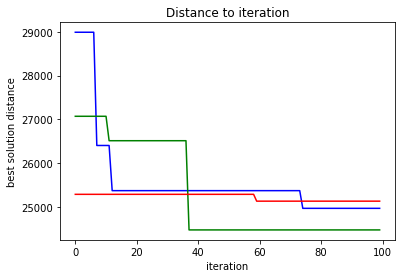

In [51]:
N = 120 # number of cities for random matrix
k = 100 # number of samples
Xsym = [None]*k
Xasym = [None]*k
Xber = [None]*k
number_of_better_solution = 0

max_distance = 500
Matrixx_sym = symetric_random_instance(N, 1, max_distance) # distances from 1 to 100
Matrixx_asym = asymetric_random_instance(N, 1, max_distance)

Matrixx_ber = set_Matrix()
Nber = np.shape(Matrixx_ber)[0]

#initial step
trace_sym = random.sample(range(N),N)
trace_asym = random.sample(range(N),N)
trace_ber = random.sample(range(Nber),Nber)

min_weight_sym  = get_weight(trace_sym, Matrixx_sym)# = funkcja liczaca wage
min_weight_asym  = get_weight(trace_asym, Matrixx_asym)# = funkcja liczaca wage
min_weight_ber  = get_weight(trace_ber, Matrixx_ber)# = funkcja liczaca wage
#print(min_weight)
# min_permutation = trace
# Wielka pentla powtarzajaca sie k-razy
for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_sym)# = funkcja liczaca wage
    if (new_weight < min_weight_sym):
        min_weight_sym = new_weight
        trace_sym = new_trace
        #number_of_better_solution += 1
    Xsym[i] = min_weight_sym

for i in range(k):
    new_trace = random.sample(range(N),N)
    new_weight = get_weight(new_trace, Matrixx_asym)# = funkcja liczaca wage
    if (new_weight < min_weight_asym):
        min_weight_asym = new_weight
        trace_asym = new_trace
    Xasym[i] = min_weight_asym

for i in range(k):
    new_trace = random.sample(range(Nber),Nber)
    new_weight = get_weight(new_trace, Matrixx_ber)# = funkcja liczaca wage
    if (new_weight < min_weight_ber):
        min_weight_ber = new_weight
        trace_ber = new_trace
    Xber[i] = min_weight_ber

print(trace_sym)
print('symetryczne : \t', min_weight_sym)
print(trace_asym)
print('asymetryczne : \t', min_weight_asym)
print(trace_ber)
print('Berlin52 : \t', min_weight_ber)
#print(number_of_better_solution)

plt.plot(Xsym, '-b')
plt.plot(Xasym, '-g')
plt.plot(Xber, '-r')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(trace)


## Metoda najbliższych sąsiadów (odległość)
1. Chose start city
2. Find nearest neighbour for that city ang go there
    - min_distance = distance(current_city, 0_city)
    - min_city = 0_city
    - for i in (N): 
    -   new_distance = distance(current_city, i_city)
    -   if (new_distance < min_distance>) -> min_distance = new_distance, min_city = i_city
    - current_city = min_city
    - add current_city to the way (permutation)
3. Repeat 2nd step for N-times where N is the number of cities

In [52]:
def swapPositions(list, pos1, pos2):
    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list

In [53]:
def nearest_neighbour(aval_city, city_index, Distance_Matrix):
    n = len(aval_city)
    min = Distance_Matrix[city_index][0]
    min_ind = aval_city[0]
    for i in range(1, n):
        next_city = aval_city[i]
        if(Distance_Matrix[city_index][next_city] < min):
                min = Distance_Matrix[city_index][next_city]
                min_ind = aval_city[i]
    aval_city.remove(min_ind)
    return min_ind


In [54]:
N = 120 # number of cities
Matrixx = symetric_random_instance(N, 1, 100)
Matrixx = set_Matrix()
N = np.shape(Matrixx)[0]
solution = [None]*N
aval_city = list(range(0,N))
print(aval_city)
for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    solution[i] = go_to

distance = get_weight(solution, Matrixx)
print(distance)
#print(solution)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
22128.0


22321.0
17089.0


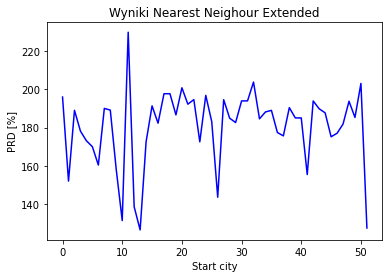

In [72]:
N = 120 # number of cities

#Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance

N = np.shape(Matrixx)[0]
best_solution = [None]*N
current_solution = [None]*N
aval_city = list(range(0,N))
X = np.array([])

for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    best_solution[i] = go_to
best_distance = get_weight(best_solution, Matrixx)

X = np.append(X, best_distance)
#X.append(best_distance)
print(best_distance)

for i in range(1, N):
    aval_city = list(range(0,N))
    for j in range(N):
        go_to = nearest_neighbour(aval_city, i, Matrixx)
        current_solution[j] = go_to
    current_distance = get_weight(current_solution, Matrixx)
    if(current_distance < best_distance):
        best_solution = current_solution
        best_distance = current_distance
    X = np.append(X, current_distance)

print(best_distance)
Best =  7542
X = X - Best
X = (X / Best )* 100
plt.plot(X, '-b')
plt.xlabel('Start city')
plt.ylabel('PRD [%]')
# giving a title to my graph
plt.title('Wyniki Nearest Neighour Extended')
plt.savefig('obrazki/wyniki-nne')
#print_solution(trace)

## Metoda najbliższych sąsiadów (swap)

In [56]:
def nearest_swap_neighbour(city_list, Distance_Matrix):
    leng = len(city_list)
    min_weight = get_weight(city_list, Distance_Matrix)
    best_trace = city_list.copy()
    current_trace = city_list.copy()
    for i in range(int(leng/2 +1 )):
        for j in range(leng):
            current_trace = city_list.copy()
            current_trace = swapPositions(current_trace, i, j)
            current_weight = get_weight(current_trace, Distance_Matrix)
            if(current_weight < min_weight):
                best_trace = current_trace
                min_weight = current_weight
    return best_trace

In [57]:
N = 120 # number of cities
k = 100 # how many tryes

#Matrixx_sym = symetric_random_instance(N, 1, 500)   # random
Matrixx_ber = set_Matrix()  # instance

Nber = np.shape(Matrixx_ber)[0]

best_solution = [None]*N
current_solution = [None]*N

trace = random.sample(range(Nber),Nber)
min_weight  = get_weight(trace, Matrixx_ber)# = funkcja liczaca wage
print(min_weight)

for i in range(k):
    trace = nearest_swap_neighbour(trace, Matrixx_ber)

print(get_weight(trace, Matrixx_ber))
#print(trace)



29576.0
12505.0


29874
5611


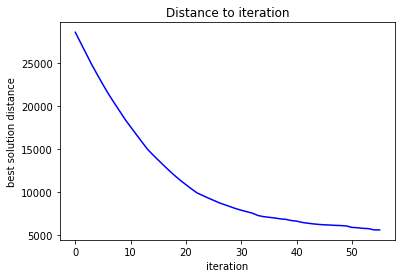

In [58]:
N = 120 # number of cities

#Matrixx_ber = set_Matrix()  # instance
# #Nber = np.shape(Matrixx_ber)[0]
Matrixx_sym = symetric_random_instance(N, 1, 500)   # random



best_solution = [None]*N
current_solution = [None]*N
X = []

trace = random.sample(range(N),N)
min_weight_sym  = get_weight(trace, Matrixx_sym)# = funkcja liczaca wage
print(min_weight_sym)

while(True):
    trace_old = trace.copy()
    trace = nearest_swap_neighbour(trace, Matrixx_sym) # whole step not just simple swap - if this don't update trace then stop
    old = get_weight(trace_old, Matrixx_sym)
    new = get_weight(trace, Matrixx_sym)
    if (old <= new):
        break
    X.append(get_weight(trace, Matrixx_sym))

print(get_weight(trace, Matrixx_sym))
#print(trace)
plt.plot(X, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(best_solution)

Można badać zależność od wariantu problemu (np. czy jest
różnica pomiędzy działaniem algorytmu dla komiwojażera euklidesowego, symetrycznego i asymetrycznego?).
Ponadto można badać zależność od parametrów danego algorytmu (np. wartości k dla algorytmu k-random,
zwykły najbliższy sąsiad vs rozszerzony, różne warianty rozwiązania startowego dla 2-opt).

## Metoda 2-opt

In [59]:
def invert(city_list, i, j):
    leng = len(city_list)
    leng_sub_list = j - i 
    current_trace = city_list.copy()
    for k in range(int(leng_sub_list/2 + 1)):
        current_trace = swapPositions(current_trace, i, j - k)
        #print(leng_sub_list)
        i += 1
        # print(current_trace)

    return current_trace

8427.0


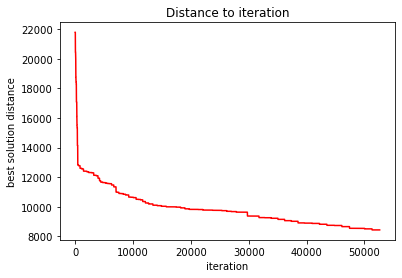

111.73428798727127 %


In [60]:
# N = 50 # number of cities
# k = 10000

# Matrixx = symetric_random_instance(N, 1, 100) # random
Matrixx = set_Matrix()  # instance
N = np.shape(Matrixx)[0]

best_solution = [None]*N
current_solution = [None]*N
X = []
Y = []
aval_city = list(range(0,N))
# trace = random.sample(range(N),N)
for i in range(N):
    go_to = nearest_neighbour(aval_city, i, Matrixx)
    best_solution[i] = go_to
min_weight  = get_weight(best_solution, Matrixx)# = funkcja liczaca wage
#print(min_weight)
#print(best_solution)
improved = True
while(improved):
    i = 0
    while i < N-1:
        j = i + 1
        while j < N:
            current_solution = best_solution.copy()
            current_solution = invert(current_solution, i, j)
            current_distance = get_weight(current_solution, Matrixx)
            if(current_distance < min_weight):
                best_solution = current_solution
                min_weight = current_distance
                i = 0
                j = 0
            
            X.append(min_weight)
            
            j += 1
        Y.append(min_weight)
        i += 1

    improved = False

print(get_weight(best_solution, Matrixx))
plt.plot(X, '-r')
# plt.plot(Y, '-b')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
# giving a title to my graph
plt.title('Distance to iteration')
plt.show()
#print_solution(best_solution)
PRD = min_weight / 7542 * 100
print(PRD, "%")
# print(X)
# print(Y)


2opt full - generating full nearest neighbour space and choose best one from them

In [61]:
def opt2_full(n, distance_matrix):
    best_solution = [None] * n
    current_solution = [None] * n
    solution = nearest_neighbor(n, 0, distance_matrix)
    best_solution = solution
    min_weight = get_weight(best_solution, distance_matrix)
    i = 0
    improved = True
    potential_best_solution = best_solution
    potential_min_weight = min_weight
    while improved:
        while i < n - 1:
            j = i + 1
            while j < n:
                current_solution = best_solution.copy()
                current_solution = invert(current_solution, i, j)
                current_distance = get_weight(current_solution, distance_matrix)
                if current_distance < potential_min_weight:
                    potential_best_solution = current_solution
                    potential_min_weight = current_distance

                j += 1
            i += 1
        if potential_best_solution >= best_solution:
            
            improved = False
        else:
            best_solution = potential_best_solution
            min_weight = potential_min_weight
            
    return best_solution

[[0.  0.1 0.2 0.3]
 [1.  1.1 1.2 1.3]]
1.0


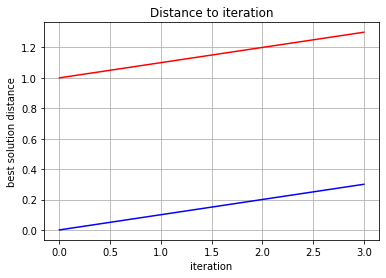

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[], []])
X = np.append(X, np.array([[0.0], [1.0]]), axis = 1)
X = np.append(X, np.array([[0.1], [1.1]]), axis = 1)
X = np.append(X, np.array([[0.2], [1.2]]), axis = 1)
X = np.append(X, np.array([[0.3], [1.3]]), axis = 1)
print(X)
print(X[1][0])
plt.plot(X[0], '-b', X[1], '-r')
plt.xlabel('iteration')
plt.ylabel('best solution distance')
plt.title('Distance to iteration')
plt.grid(True)
plt.show()

generowanie instancji losowych + wyświetlenie macierzy
    rozmiar, wariant, seed, zakres wartości(odległości)

odpalić algorytmy: wybór instancji
    k-random, dla różnych k
    najbliższy sąsiad (2)
    2opt (może być kilka wersji + warianty jesli są)

co dostać: cykl, długość, PRD

In [66]:
import math
import random
import tsplib95
from tsplib95 import distances
import numpy as np
import matplotlib.pyplot as plt


def matrix(coord, distance):
    n = len(coord)
    distance_matrix = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            distance_matrix[i][j] = int(distance((coord[i][0], coord[i][1]), (coord[j][0], coord[j][1])))
    return n, distance_matrix


def symetric_random_instance(number_of_cities, min_distance, max_distance, seed):
    np.random.seed(seed)
    rand_matrix = np.random.randint(min_distance, max_distance + 1, size=(number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
        for j in range(number_of_cities):
            rand_matrix[j][i] = rand_matrix[i][j]
    return number_of_cities, rand_matrix


def asymetric_random_instance(number_of_cities, min_distance, max_distance, seed):
    np.random.seed(seed)
    rand_matrix = np.random.randint(min_distance, max_distance + 1, size=(number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        rand_matrix[i][i] = 0
    return number_of_cities, rand_matrix


def euclidean_random_instance(number_of_cities, max_x, max_y, seed):
    distance = distances.euclidean
    np.random.seed(seed)
    coord = np.array([(np.random.randint(0, max_x, dtype=int), np.random.randint(0, max_y, dtype=int)) for _ in range(number_of_cities)])
    distance_matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(0, number_of_cities):
        for j in range(0, number_of_cities):
            distance_matrix[i][j] = int(distance((coord[i][0], coord[i][1]), (coord[j][0], coord[j][1])))
    return number_of_cities, distance_matrix, coord


def explicit_instance(filename, type):
    if type == 'tsp':
        instance = tsplib95.load('instance/' +filename)
    elif type =='atsp':
        instance = tsplib95.load('instance/' +filename) 
    edges = list(instance.get_edges())
    nodes = len(list(instance.get_nodes()))
    length = len(edges)
    weight = [None]*length
    matrix = np.zeros((nodes, nodes))
    for i in range(0, length):
        weight[i] = instance.get_weight(edges[i][0], edges[i][1])
        matrix[edges[i][0]-1][edges[i][1]-1] = weight[i]

    return nodes, matrix


def euclidean_instance(filename):
    instance = tsplib95.load('instance/' +filename)
    nodes =  len(list(instance.get_nodes()))
    edges =  list(instance.get_edges())
    length = len(edges)
    weight = [None]*length
    matrix = np.zeros((nodes, nodes))
    for i in range(0, length):
        weight[i] = instance.get_weight(edges[i][0], edges[i][1])
        matrix[edges[i][0]-1][edges[i][1]-1] = weight[i]

    return nodes, matrix


def read_file(filename, type):

    if type == 'tsp':
        f = open('instance/' +filename, 'r')
    elif type == 'atsp':
        f = open('instance/' +filename, 'r')

    name = f.readline().strip().split()[1]
    filetype = f.readline().strip().split()[1]
    comment = f.readline().strip().split()[1]
    dimension = f.readline().strip().split()[1] 

    line = f.readline()

    while line.find("EDGE_WEIGHT_TYPE") == -1:
        line = f.readline()

    if line.find("EUC_2D") != -1:
        number_of_cities, distance_matrix = euclidean_instance(filename)
    elif line.find("MAN_2D") != -1:
        distance = distances.manhattan
    elif line.find("MAX_2D") != -1:
        distance = distances.maximum
    elif line.find("GEO") != -1:
        distance = distances.geographical
    elif line.find("CEIL_2D") != -1:
        distance = distances.functools.partial(distances.euclidean, round=math.ceil)
    elif line.find("EXPLICIT") != -1:
        number_of_cities, distance_matrix = explicit_instance(filename, type)
    else:
        raise Exception
    
    #while line.find("NODE_COORD_SECTION") == -1:
    #    line = f.readline()

    #n = int(dimension)
    #coord = []
    #for i in range(0, n):
    #    x, y = f.readline().strip().split()[1:]
    #    coord.append([float(x), float(y)])

    #number_of_cities, distance_matrix = matrix(coord, distance)
    #number_of_cities, distance_matrix
    return number_of_cities, distance_matrix


def rand_tour(n):
    tour = list(range(n))
    random.shuffle(tour)
    return tour


def swap_positions(tour, i, j):
    tour[i], tour[j] = tour[j], tour[i]
    return tour


def get_weight(tour, distance_matrix):
    weight = distance_matrix[tour[0]][tour[-1]]
    for i in range(1, len(tour)):
        weight += distance_matrix[tour[i]][tour[i - 1]]
    return weight


def nearest(last, unvisited, distance_matrix):
    near = unvisited[0]
    min_distance = distance_matrix[last][near]
    for i in unvisited[1:]:
        if distance_matrix[last][i] < min_distance:
            near = i
            min_distance = distance_matrix[last][near]
    return near


def nearest_neighbor(n, i, distance_matrix):
    unvisited = list(range(n))
    unvisited.remove(i)
    last = i
    tour = [i]
    while unvisited:
        nexxt = nearest(last, unvisited, distance_matrix)
        tour.append(nexxt)
        unvisited.remove(nexxt)
        last = nexxt
    return tour


def nearest_neighbor_extended(n, distance_matrix):
    best_tour = nearest_neighbor(n, 0, distance_matrix)
    for i in range(1,n):
        current_tour = nearest_neighbor(n, i, distance_matrix)
        if get_weight(current_tour, distance_matrix) < get_weight(best_tour, distance_matrix):
            best_tour = current_tour
    return best_tour


def nearest_swap_neighbor(number_of_cities, distance_matrix):
    tour = nearest_neighbor(number_of_cities, 0, distance_matrix)
    length = len(tour)
    min_weight = get_weight(tour, distance_matrix)
    best_tour = tour.copy()
    current_tour = tour.copy()
    for i in range(int(length / 2 + 1)):
        for j in range(length):
            current_tour = tour.copy()
            current_tour = swap_positions(current_tour, i, j)
            current_weight = get_weight(current_tour, distance_matrix)
            if current_weight < min_weight:
                best_tour = current_tour
                min_weight = current_weight
    return best_tour


def krandom(n, k, distance_matrix):
    results = [None] * k
    best_tour = rand_tour(n)
    min_weight = get_weight(best_tour, distance_matrix)
    for i in range(k):
        new_tour = rand_tour(n)
        new_weight = get_weight(new_tour, distance_matrix)
        if new_weight < min_weight:
            min_weight = new_weight
            best_tour = new_tour
        results[i] = min_weight
    return best_tour


def invert(tour, i, j):
    length_sub_list = j - i
    current_tour = tour.copy()
    for k in range(int(length_sub_list / 2 + 1)):
        current_tour = swap_positions(current_tour, i, j - k)
        i += 1
    return current_tour


def opt2(n, distance_matrix):
    best_solution = [None] * n
    current_solution = [None] * n
    solution = nearest_neighbor(n, 0, distance_matrix)
    best_solution = solution
    min_weight = get_weight(best_solution, distance_matrix)
    i = 0
    while i < n - 1:
        j = i + 1
        while j < n:
            current_solution = best_solution.copy()
            current_solution = invert(current_solution, i, j)
            current_distance = get_weight(current_solution, distance_matrix)
            if current_distance < min_weight:
                best_solution = current_solution
                min_weight = current_distance
                i = 0
                j = 0
            j += 1
        i += 1
    return best_solution


def opt2_full(n, distance_matrix):
    best_solution = [None] * n
    current_solution = [None] * n
    solution = nearest_neighbor(n, 0, distance_matrix)
    best_solution = solution
    min_weight = get_weight(best_solution, distance_matrix)
    i = 0
    improved = True
    potential_best_solution = best_solution
    potential_min_weight = min_weight
    while improved:
        while i < n - 1:
            j = i + 1
            while j < n:
                current_solution = best_solution.copy()
                current_solution = invert(current_solution, i, j)
                current_distance = get_weight(current_solution, distance_matrix)
                if current_distance < potential_min_weight:
                    potential_best_solution = current_solution
                    potential_min_weight = current_distance

                j += 1
            i += 1
        if potential_best_solution >= best_solution:
            
            improved = False
        else:
            best_solution = potential_best_solution
            min_weight = potential_min_weight
            
    return best_solution


def prd1(solution, best_known):
    return 100 * ((solution - best_known) / best_known)


def prd2(tour, best_known, distance_matrix):
    return 100 * ((get_weight(tour, distance_matrix) - best_known) / best_known)


def print_tour(tour):
    length = len(tour)
    for i in range(length - 1):
        print(tour[i], '->', tour[i + 1], '\n')


def print_data(best_tour, best_known, distance_matrix):
    print("\n----------------------------------------------------------\n")
    # cykl
    print("Cykl: ", best_tour)
    # dł ścieżki
    print("Dlugosc sciezki: ", get_weight(best_tour, distance_matrix))
    # PRD
    print("PRD :", prd2(best_tour, best_known, distance_matrix), "%")


def scatter_cities(cities_list):
    X, Y = cities_list.T
    plt.scatter(X, Y, marker='x')
    plt.show()

def main():
    instance_list_tsp = ['berlin52.tsp', 'ch130.tsp', 'gr120.tsp']
    for x in instance_list_tsp:
        filename = x
        number_of_cities, distance_matrix = read_file(filename, type='tsp')
        print(distance_matrix)

if __name__ == '__main__':

    main()

[[   0.  666.  281. ...  217.  789. 1220.]
 [ 666.    0.  649. ...  596. 1422. 1716.]
 [ 281.  649.    0. ...  463.  995. 1484.]
 ...
 [ 217.  596.  463. ...    0.  830. 1151.]
 [ 789. 1422.  995. ...  830.    0.  625.]
 [1220. 1716. 1484. ... 1151.  625.    0.]]
[[  0. 119. 170. ...  90. 167.  82.]
 [119.   0. 139. ... 176. 271.  57.]
 [170. 139.   0. ... 146. 333. 106.]
 ...
 [ 90. 176. 146. ...   0. 208. 120.]
 [167. 271. 333. ... 208.   0. 247.]
 [ 82.  57. 106. ... 120. 247.   0.]]
[[  0. 534. 434. ... 435. 369. 121.]
 [534.   0. 107. ... 653. 167. 511.]
 [434. 107.   0. ... 560.  79. 418.]
 ...
 [435. 653. 560. ...   0. 488. 320.]
 [369. 167.  79. ... 488.   0. 347.]
 [121. 511. 418. ... 320. 347.   0.]]
